In [1]:
import dash
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt

In [2]:
###Dash Version:
print(dash.__version__)

2.13.0


## This notebook shows how to create various plotly graphs.

### The basic 10 step process is:
##### 1 - Selecting the basic chart type (bar-chart, pie-chart etc)
##### 2 - Adjusting the chart size
##### 3 - Adjusting the bar width
##### 4 - Adding Data Labels
##### 5 - Customizing data labels
##### 6 - Adding chart titles
##### 7 - Changing the Bar-chart color
##### 8 - changing the Chart theme.

In [3]:
avos = pd.read_csv('./data/avos.csv', parse_dates=['date'])
avos.dtypes

date               datetime64[ns]
average_price             float64
total_volume              float64
type                       object
year                        int64
state                      object
region                     object
season                     object
price_bin                 float64
average_revenue           float64
dtype: object

In [4]:
organic = avos.query("type == 'organic' & year == 2015 ")
organic = pd.DataFrame(organic)
organic.sort_values(by='date')

date  average_price  total_volume     type  year  \
1    2015-01-04           1.79       1373.95  organic  2015   
53   2015-01-04           1.93      17328.24  organic  2015   
55   2015-01-04           1.83       7301.30  organic  2015   
57   2015-01-04           1.80       2057.29  organic  2015   
59   2015-01-04           1.72       3788.60  organic  2015   
...         ...            ...           ...      ...   ...   
4830 2015-12-27           1.49       1726.25  organic  2015   
4832 2015-12-27           1.82       1754.98  organic  2015   
4834 2015-12-27           1.94       4595.50  organic  2015   
4838 2015-12-27           1.82        862.59  organic  2015   
4886 2015-12-27           1.81       7155.63  organic  2015   

                     state        region  season  price_bin  average_revenue  
1                   Albany     Northeast  winter        2.0        649777.91  
53                New York     Northeast  winter        2.0        700598.52  
55    Northern New England     Northeast  winter        2.0        664298.08  
57                 Orlando     Southeast  winter        2.0        653407.95  
59            Philadelphia  Mid-Atlantic  winter        2.0        624367.60  
...                    ...           ...     ...        ...              ...  
4830          Indianapolis       Midwest  winter        2.0        540876.58  
4832          Jacksonville     Southeast  winter        2.0        660668.04  
4834             Las Vegas          West  winter        2.0        704228.57  
4838            Louisville     Southeast  winter        2.0        660668.04  
4886   West Tex/New Mexico          West  winter        2.0        657037.99  

[2443 rows x 10 columns]

### Creating a Basic Bar Chart

In [5]:
monthly_data = organic.groupby(organic['date'].dt.month_name())['total_volume'].median().reset_index()
# dual_xs = organic.groupby([organic['date'].dt.month_name(),'average_price'])[['total_volume','average_price']].median().reset_index()

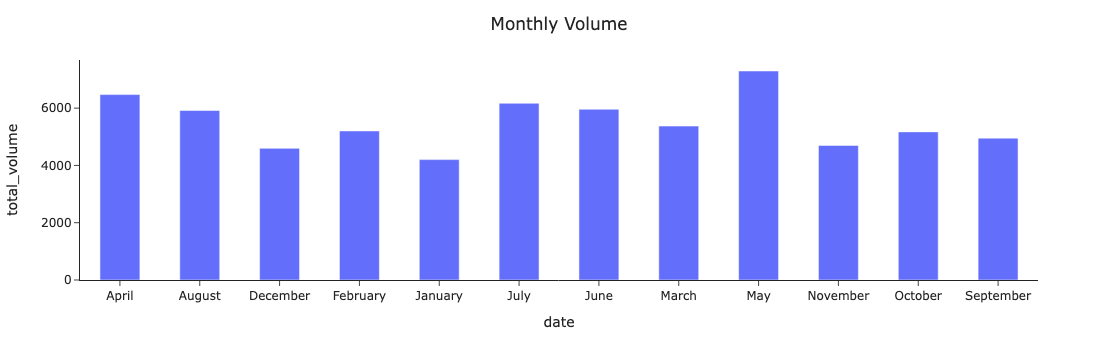

In [6]:
fig = px.bar(monthly_data,x='date', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) ## center the title
fig.update_traces(width=0.5)
fig.show()

### Adjusting the Chart Size - use width and height

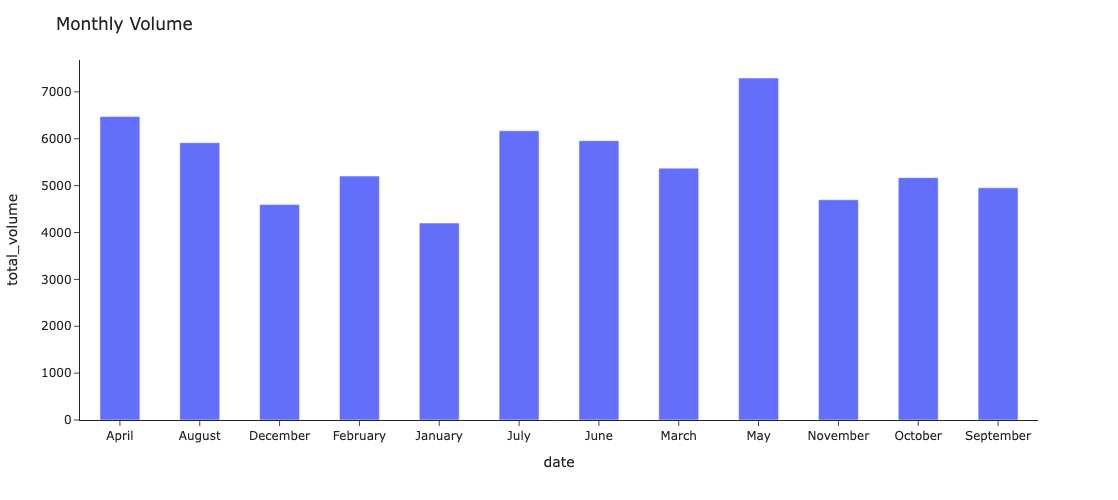

In [7]:
fig = px.bar(monthly_data,x='date', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', width=1000, height=500) ##update chart width
fig.update_traces(width=0.5)## this is used to update the bar-width
fig.show()

### Adding Data Labels

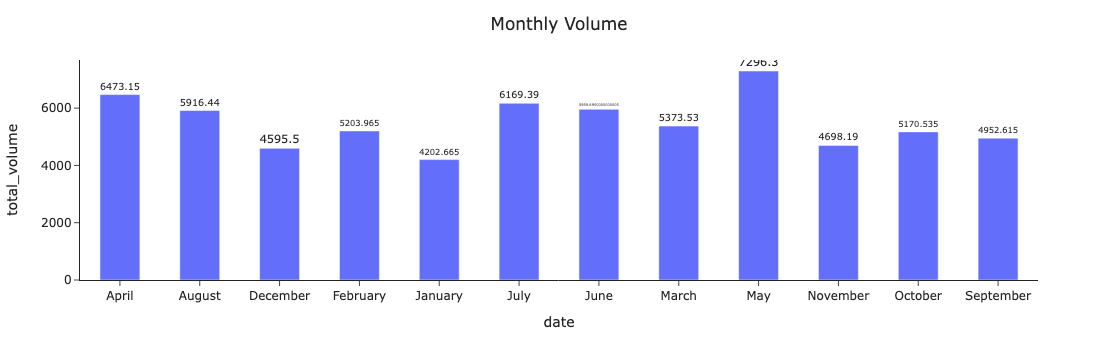

In [8]:
fig = px.bar(monthly_data,x='date', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) 
fig.update_traces(width=0.5, text=monthly_data['total_volume'], textposition='outside')### this shows where to place the label values
fig.show()

### Changing the color of the bars

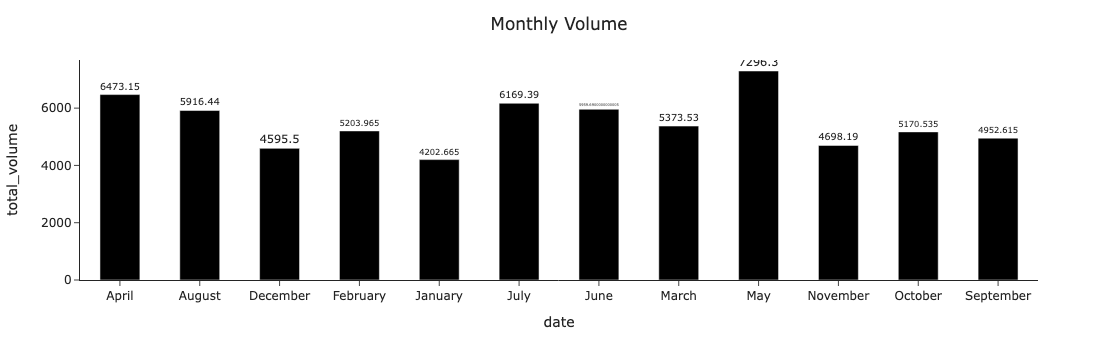

In [9]:
fig = px.bar(monthly_data,x='date', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) 
fig.update_traces(width=0.5, text=monthly_data['total_volume'],textposition='outside',textfont=dict(size=14), marker_color='black')### this shows where to place the label values
fig.show()

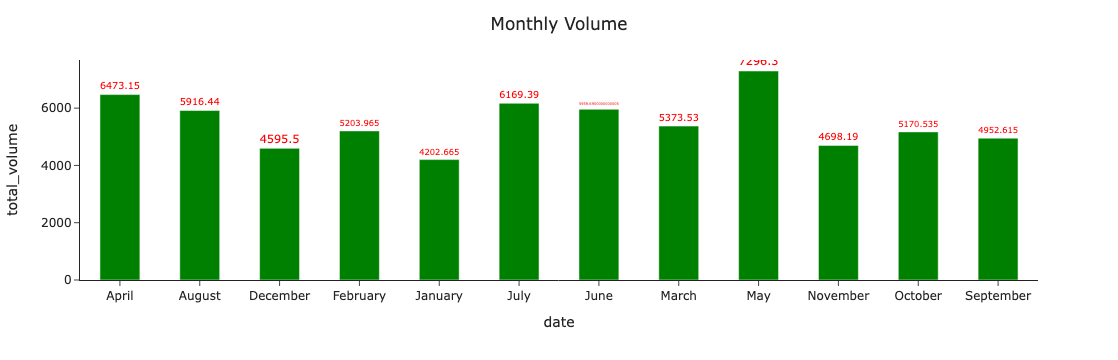

In [10]:
fig = px.bar(monthly_data,x='date', y='total_volume')
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5) 
fig.update_traces(width=0.5, text=monthly_data['total_volume'],textposition='outside',marker_color='green',
            textfont=dict(
                size=18,
                color='red',
    ))
fig.show()

### Creating a Basic Line Chart

In [11]:
monthly_data.head()
monthly_data.dtypes

date             object
total_volume    float64
dtype: object

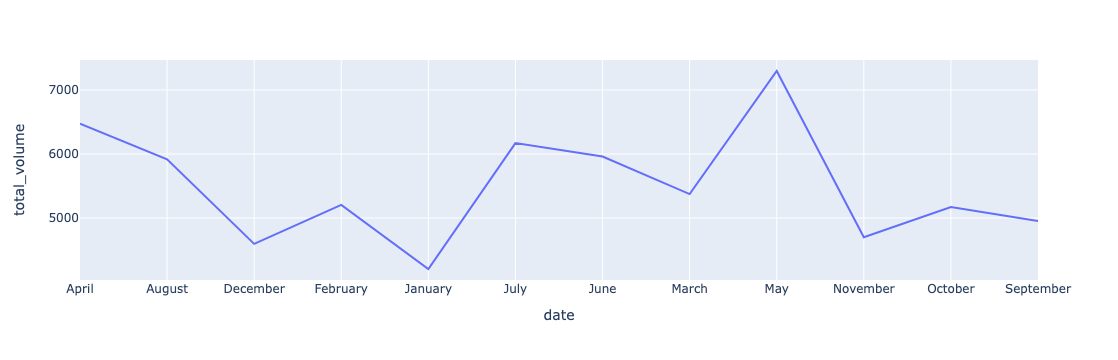

In [12]:
fig = px.line(monthly_data, x='date', y='total_volume')
fig.show()

### Adding Line Markers

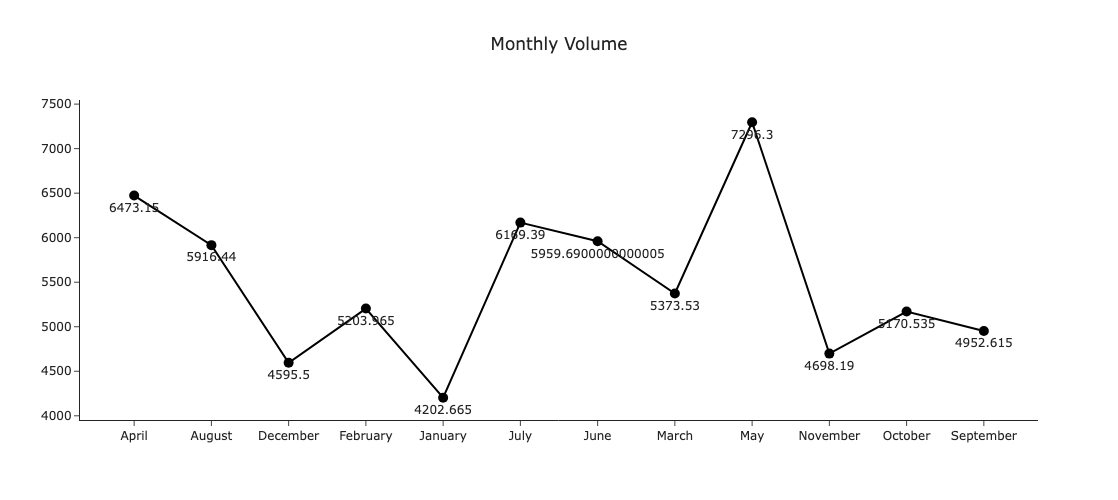

In [13]:
import plotly.graph_objects as go

# Create a line chart
fig = go.Figure(go.Scatter(
    x=monthly_data['date'],
    y=monthly_data['total_volume'],
    mode='lines+markers+text',  # To display both lines and markers
    marker=dict(size=10),  # Customize the marker size
    marker_color='black',  # Set marker color
    text=monthly_data['total_volume'],  # Add text labels for markers
    textposition='bottom center',  # Adjust text position
))

# Update the layout (title, template, etc.)
fig.update_layout( title='Monthly Volume', template='simple_white',title_x=0.5,width=1100, height=500)



# Show the plot
fig.show()


### Creating a Stacked Bar Chart

In [14]:
organic.head()

date  average_price  total_volume     type  year  \
1 2015-01-04           1.79       1373.95  organic  2015   
3 2015-01-04           1.76       3846.69  organic  2015   
5 2015-01-04           1.29      19137.28  organic  2015   
7 2015-01-04           1.64       1505.12  organic  2015   
9 2015-01-04           1.83       2192.13  organic  2015   

                  state        region  season  price_bin  average_revenue  
1                Albany     Northeast  winter        2.0        649777.91  
3               Atlanta     Southeast  winter        2.0        638887.77  
5  Baltimore/Washington  Mid-Atlantic  winter        1.0        468275.70  
7                 Boise          West  winter        2.0        595327.24  
9                Boston     Northeast  winter        2.0        664298.08

In [15]:
organic['month_name'] = organic['date'].dt.month_name()
regional_data = organic.groupby(['month_name', 'region'])['total_volume'].median().reset_index().round(2)
regional_data = regional_data.sort_values(by=['month_name', 'region', 'total_volume'], ascending=[True, True, True])
regional_data = regional_data.reset_index(drop=True)
regional_data

month_name         region  total_volume
0       April   Mid-Atlantic       7331.46
1       April        Midwest       6513.16
2       April      Northeast       3192.46
3       April  South Central      11887.45
4       April      Southeast       3622.29
..        ...            ...           ...
67  September        Midwest       6380.28
68  September      Northeast       2662.10
69  September  South Central      12465.47
70  September      Southeast       3109.16
71  September           West      10458.28

[72 rows x 3 columns]

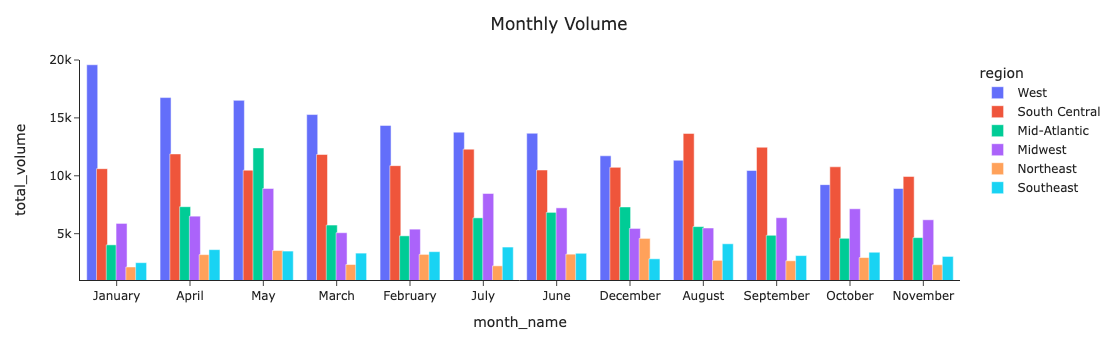

In [16]:
# sorted_month_names = sorted(regional_data['month_name'].unique())
sorted_data = regional_data.sort_values(['total_volume', 'month_name'], ascending=[False, True])
fig = px.bar(sorted_data, x='month_name', y='total_volume', color='region', barmode='group') ### barmode=group
fig.update_layout(title='Monthly Volume', template='simple_white', title_x=0.5)
fig.update_traces(width=0.15)
fig.update_xaxes(categoryorder='array', categoryarray=sorted_data)
fig.update_yaxes(range=[1000,20000])
fig.show()

### Custom Colors

##### link to docs: https://plotly.com/python/discrete-color/

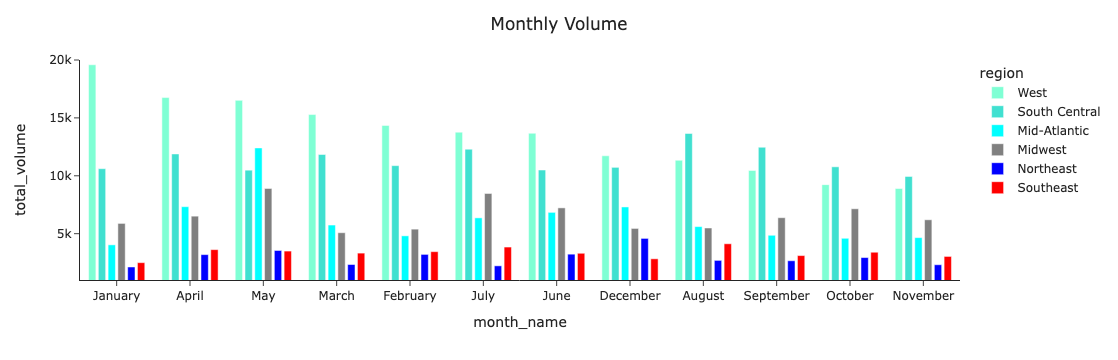

In [17]:
import plotly.express as px

# Create the bar chart with color mapping using color_discrete_sequence
fig = px.bar(
    sorted_data,
    x='month_name',
    y='total_volume',
    barmode='group',
    color='region',
    color_discrete_sequence=[
        'aquamarine',
        'turquoise',
        'aqua',
        'grey',
        'blue',
        'red'
    ]
)

# Customize the layout
fig.update_layout(
    title='Monthly Volume',
    template='simple_white',
    title_x=0.5,
)
fig.update_traces(width=0.1)
fig.update_yaxes(range=[1000, 20000])

# Show the plot
fig.show()


### Creating a Multi-Line Chart

### Best used when you have categorical data

Plotly Docs: 

In [18]:
organic.head(3)

date  average_price  total_volume     type  year  \
1 2015-01-04           1.79       1373.95  organic  2015   
3 2015-01-04           1.76       3846.69  organic  2015   
5 2015-01-04           1.29      19137.28  organic  2015   

                  state        region  season  price_bin  average_revenue  \
1                Albany     Northeast  winter        2.0        649777.91   
3               Atlanta     Southeast  winter        2.0        638887.77   
5  Baltimore/Washington  Mid-Atlantic  winter        1.0        468275.70   

  month_name  
1    January  
3    January  
5    January

In [19]:
multi_line = organic.groupby([organic['date'].dt.month_name(), 'region'])['total_volume'].median().reset_index()
multi_line.head(3)


date        region  total_volume
0  April  Mid-Atlantic      7331.460
1  April       Midwest      6513.165
2  April     Northeast      3192.455

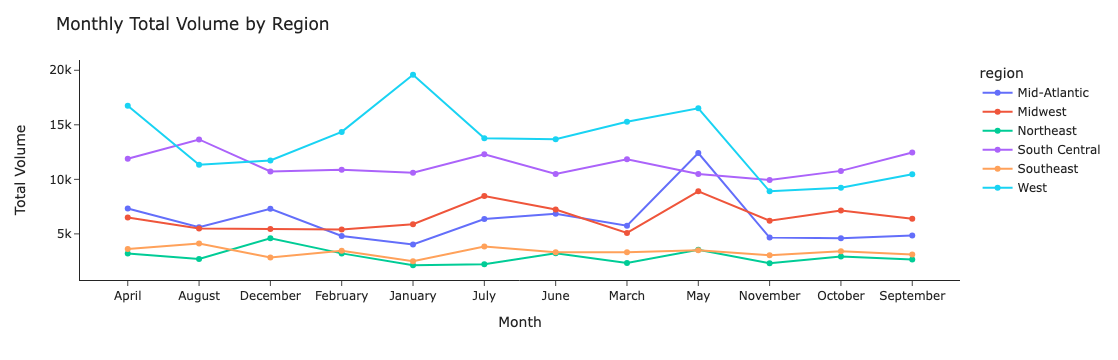

In [20]:
fig = px.line(multi_line, x='date', y='total_volume', color='region', markers=True)

fig.update_layout(
    title='Monthly Total Volume by Region',
    xaxis_title='Month',
    yaxis_title='Total Volume',
    template='simple_white',
)

fig.show()

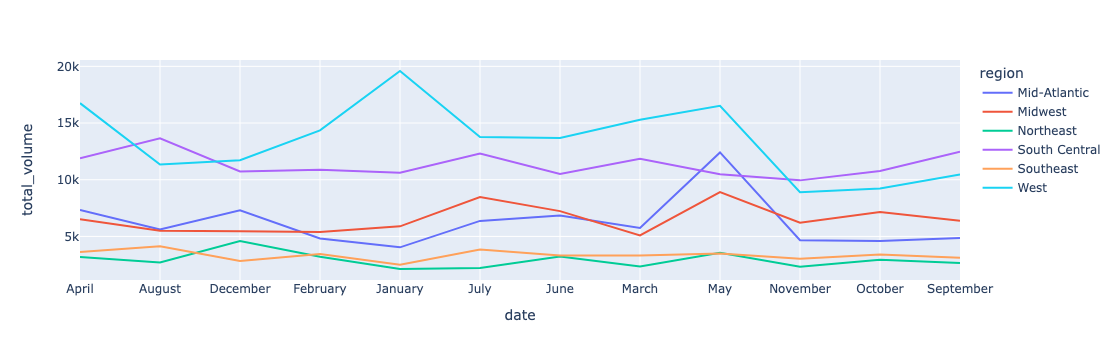

In [21]:
fig = px.line(multi_line, x='date', y='total_volume', color='region')
fig.show()

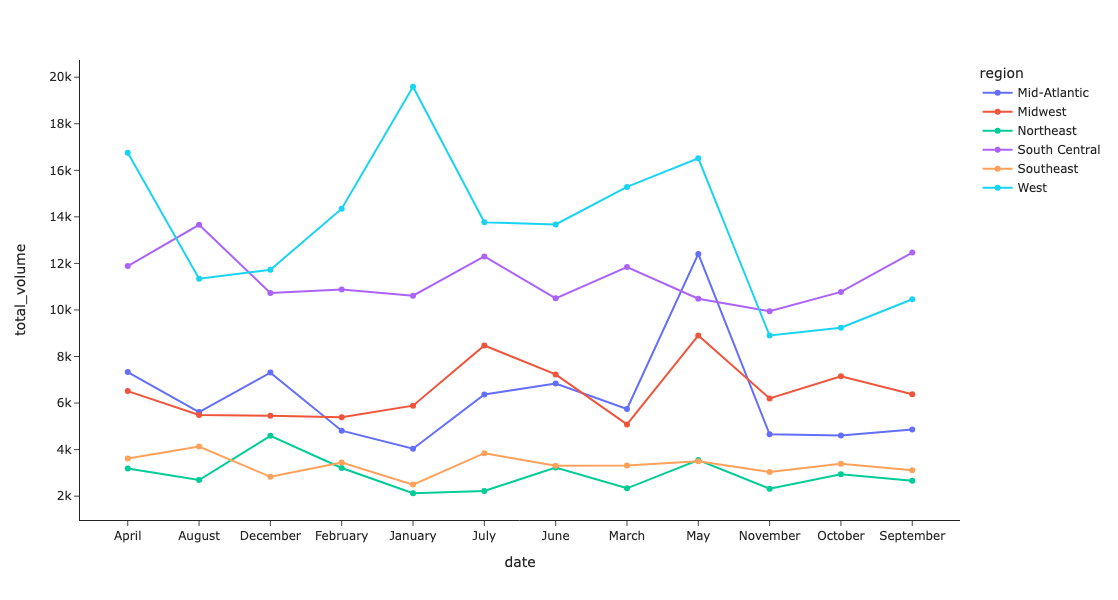

In [22]:
fig = px.line(multi_line, x='date', y='total_volume', color='region', width=1000, height=600, markers=True)
fig.update_layout(template='simple_white')
fig.show()

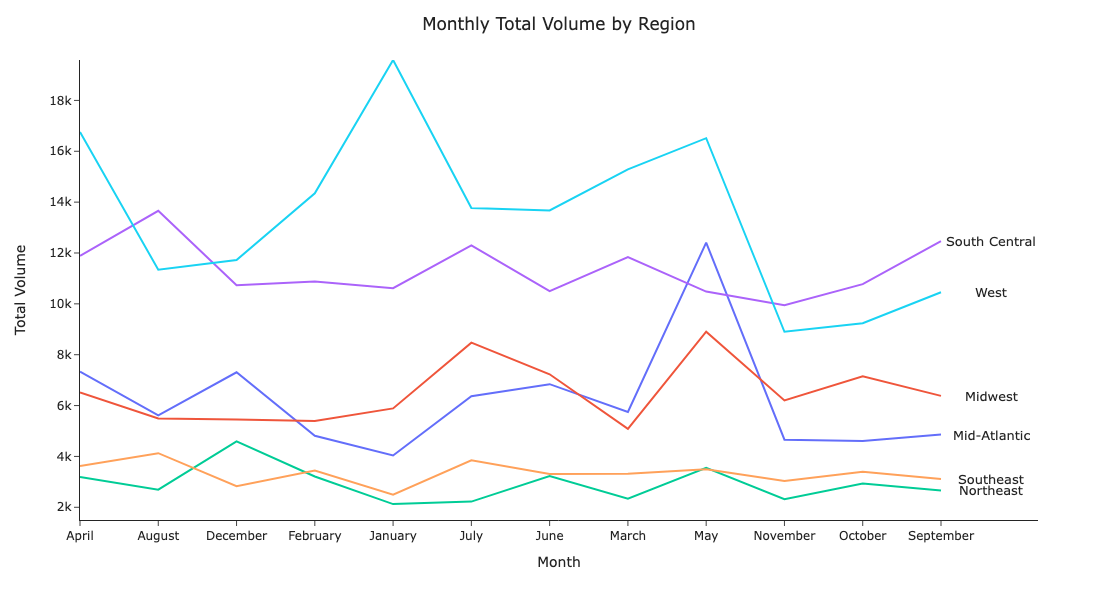

In [23]:
import plotly.express as px
import plotly.graph_objects as go


min_y_value = 1500
# Create your multi-line graph using px.line
fig = px.line(multi_line, x='date', y='total_volume', color='region', width=800,height=600,)

# Add annotations to each line
for region in multi_line['region'].unique():
    region_data = multi_line[multi_line['region'] == region]
    last_point = region_data.iloc[-1]  # Get the last data point for each region
    fig.add_annotation(
        go.layout.Annotation(
            x=last_point['date'],
            y=last_point['total_volume'],
            text=region,
            showarrow=False,
            xshift=50,  # Adjust the x position of the annotation
            font=dict(size=13),  # Customize the font size
        )
    )

# Hide the legend for the 'region' color scale
fig.update_layout(
    title='Monthly Total Volume by Region',
    title_x=0.5,
    xaxis_title='Month',
    yaxis_title='Total Volume',
    template='simple_white',
    showlegend=False,  # Hide the legend
)

fig.update_yaxes(range=[min_y_value, multi_line['total_volume'].max()])

fig.show()


### Creating a basic line chart:

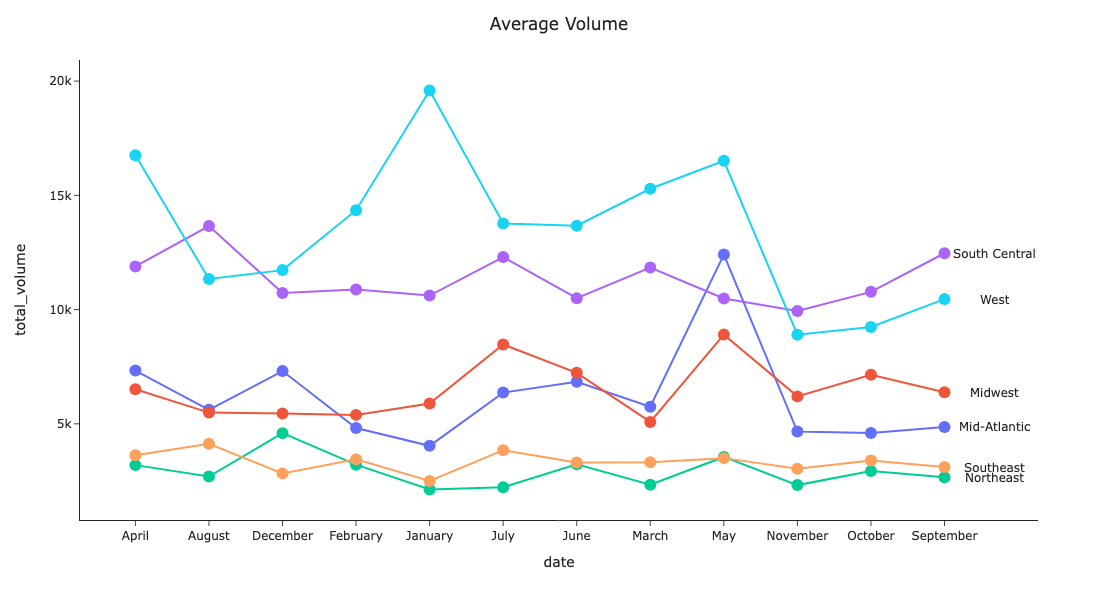

In [24]:
fig = px.line(multi_line, x='date', y='total_volume', color='region', width=900, height=600, markers=True)### basic chart
# Add annotations to each line
for region in multi_line['region'].unique():
    region_data = multi_line[multi_line['region'] == region]
    last_point = region_data.iloc[-1]  # Get the last data point for each region
    fig.add_annotation(
        go.layout.Annotation(
            x=last_point['date'],
            y=last_point['total_volume'],
            text=region,
            showarrow=False,
            xshift=50,  # Adjust the x position of the annotation
            font=dict(size=12),  # Customize the font size
        )
    )
fig.update_layout(title='Average Volume', title_x=0.5, showlegend=False, template='simple_white', )
fig.update_traces(marker_size=12)
fig.show()

#### Not Covered:
- Box Plots
- Spider Charts

### Creating a scatter chart

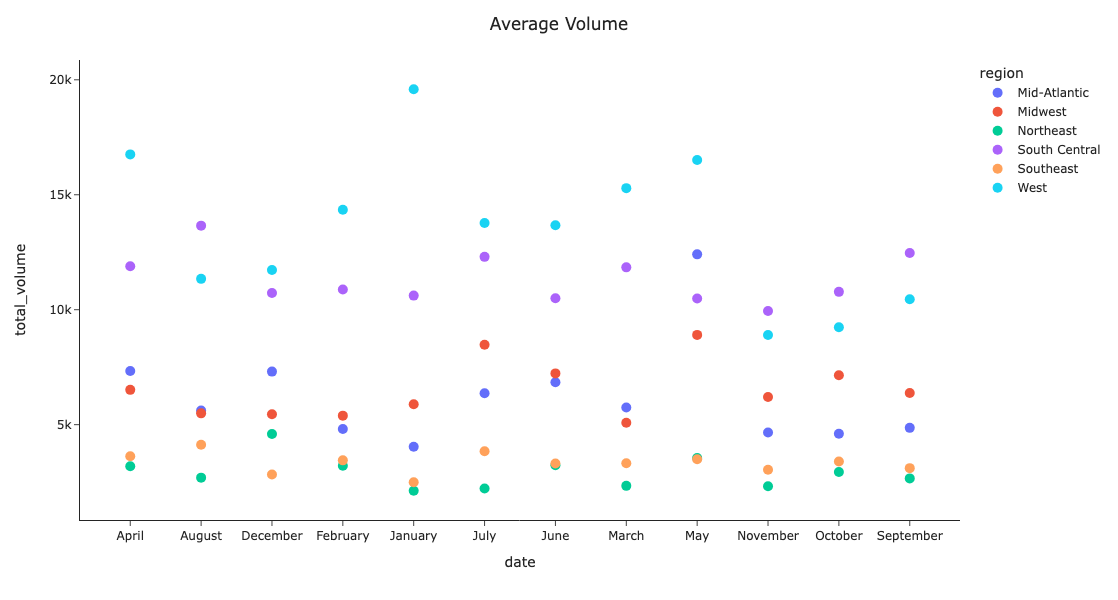

In [25]:
fig = px.scatter(multi_line, x='date', y='total_volume', color='region', width=1000, height=600)
fig.update_layout(title='Average Volume', title_x=0.5,template='simple_white')
fig.update_traces(marker_size=10)
fig.show()

In [26]:
price_scatter = organic.groupby([organic['date'].dt.month_name(), 'region'])['average_price'].mean().round(2).reset_index()
single = price_scatter.query("region == 'West'")
single

date region  average_price
5       April   West           1.56
11     August   West           1.88
17   December   West           1.53
23   February   West           1.45
29    January   West           1.37
35       July   West           1.83
41       June   West           1.67
47      March   West           1.48
53        May   West           1.52
59   November   West           1.66
65    October   West           1.88
71  September   West           1.96

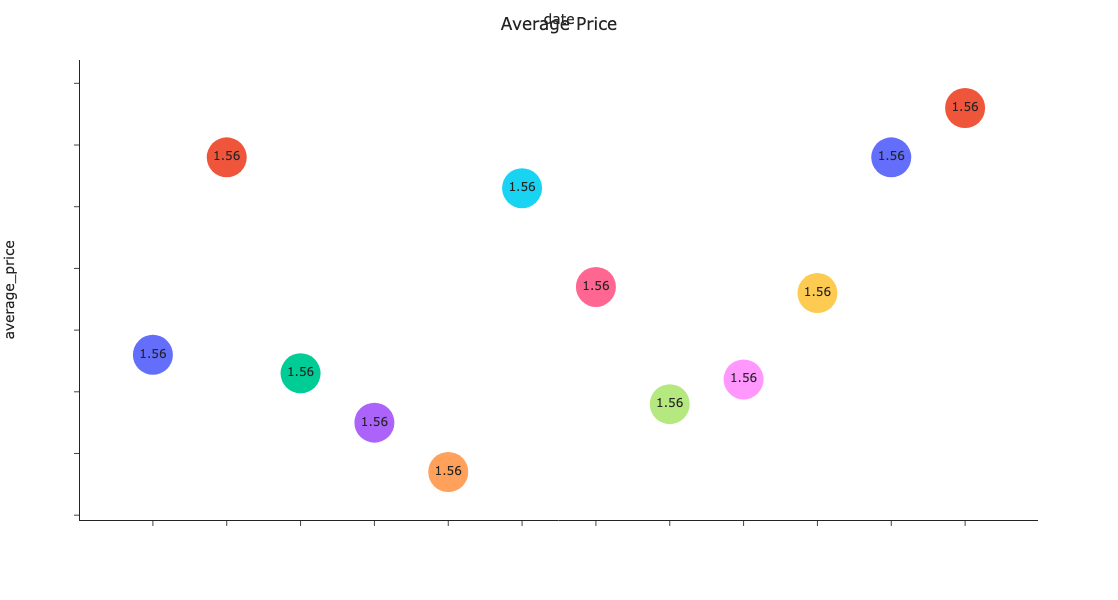

In [27]:
fig = px.scatter(single, x='date', y='average_price', color='date', width=1000, height=600)
fig.update_layout(title ='Average Price ', title_x=0.5, template='simple_white', showlegend=False,
    xaxis=dict(showticklabels=False),  # Hide x-axis tick labels
    yaxis=dict(showticklabels=False)),
fig.update_traces(marker=dict(size=40), text=single['average_price'], textposition='middle center', mode = 'markers + text')
fig.show()

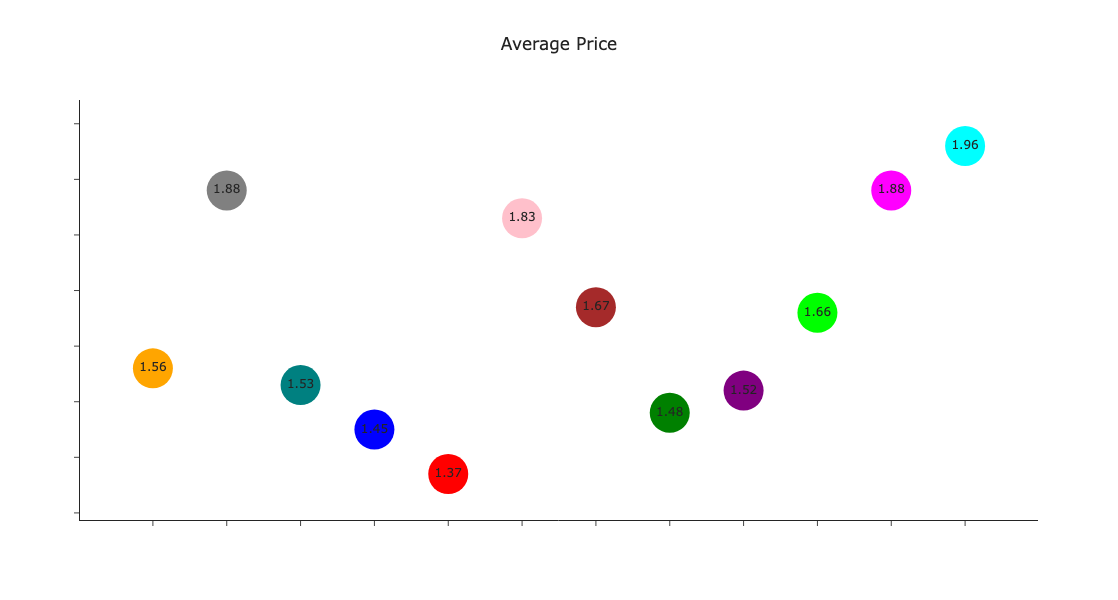

In [28]:
import plotly.graph_objects as go

# Create a color mapping for month names
month_colors = {
    'January': 'red',
    'February': 'blue',
    'March': 'green',
    'April': 'orange',
    'May': 'purple',
    'June': 'brown',
    'July': 'pink',
    'August': 'gray',
    'September': 'cyan',
    'October': 'magenta',
    'November': 'lime',
    'December': 'teal',
}

price_scatter = organic.groupby([organic['date'].dt.month_name(), 'region'])['average_price'].mean().round(2).reset_index()
single = price_scatter.query("region == 'West'")

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=single['date'],
    y=single['average_price'],
    mode='markers+text',
    marker=dict(size=40, color=[month_colors[month] for month in single['date']]),
    text=single['average_price'],
    textposition='middle center'
))

fig.update_layout(
    title='Average Price',
    title_x=0.5,
    template='simple_white',
    showlegend=False,
    xaxis=dict(showticklabels=False),  # Hide x-axis tick labels
    yaxis=dict(showticklabels=False),  # Hide y-axis tick labels
    width=1000,
    height=600
)

fig.show()




In [29]:
# import plotly.graph_objects as go

# # Create a color mapping for month names
# month_colors = {
#     'January': 'red',
#     'February': 'blue',
#     'March': 'green',
#     'April': 'orange',
#     'May': 'purple',
#     'June': 'brown',
#     'July': 'pink',
#     'August': 'gray',
#     'September': 'cyan',
#     'October': 'magenta',
#     'November': 'lime',
#     'December': 'teal',
# }

# price_scatter = organic.groupby([organic['date'].dt.month_name(), 'region'])['average_price'].mean().round(2).reset_index()
# single = price_scatter.query("region == 'West'")

# fig = go.Figure()

# fig.add_trace(go.Scatter(
#     x=single['date'],
#     y=single['average_price'],
#     mode='markers+text',
#     marker=dict(size=40, color=[month_colors[month] for month in single['date']]),
#     text=single['average_price'],
#     textposition='middle center'
# ))

# # Add annotations for the x-values at the top center
# for _, row in single.iterrows():
#     fig.add_annotation(
#         go.layout.Annotation(
#             x=row['date'],
#             y=row['average_price'],
#             text=row['date'],
#             showarrow=False,
#             font=dict(size=10),
#             yshift=20,  # Adjust the y position of the annotation
#             textposition='top center',
#         )
#     )

# fig.update_layout(
#     title='Average Price',
#     title_x=0.5,
#     template='simple_white',
#     showlegend=False,
#     xaxis=dict(showticklabels=False),  # Hide x-axis tick labels
#     yaxis=dict(showticklabels=False),  # Hide y-axis tick labels
#     width=1000,
#     height=600
# )

# fig.show()


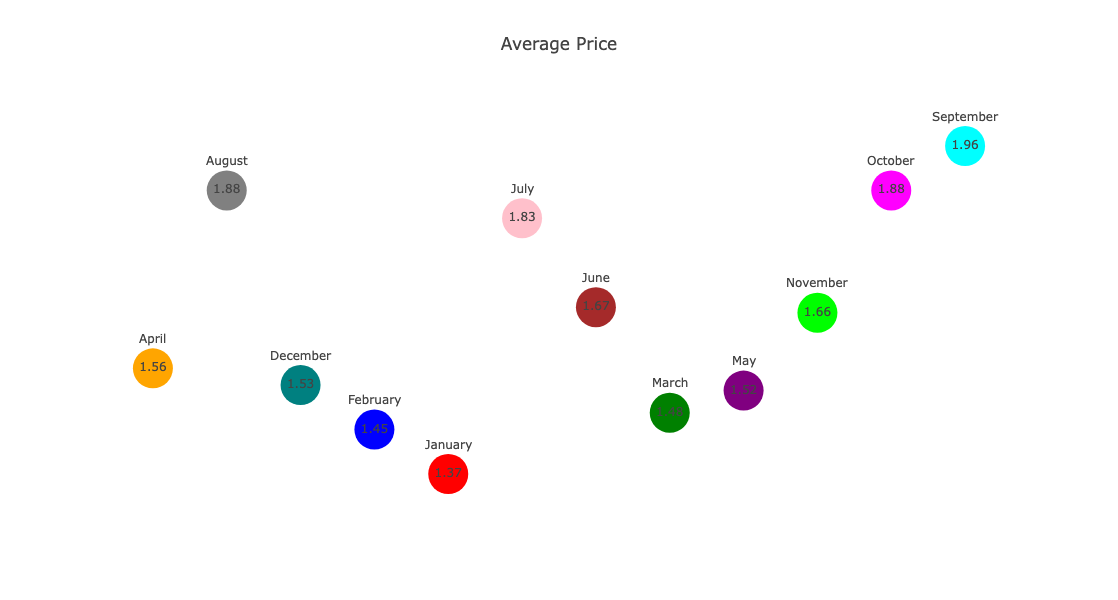

In [54]:
import plotly.graph_objects as go

# Create a color mapping for month names
month_colors = {
    'January': 'red',
    'February': 'blue',
    'March': 'green',
    'April': 'orange',
    'May': 'purple',
    'June': 'brown',
    'July': 'pink',
    'August': 'gray',
    'September': 'cyan',
    'October': 'magenta',
    'November': 'lime',
    'December': 'teal',
}

price_scatter = organic.groupby([organic['date'].dt.month_name(), 'region'])['average_price'].mean().round(2).reset_index()
single = price_scatter.query("region == 'West'")

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=single['date'],
    y=single['average_price'],
    mode='markers+text',
    marker=dict(size=40, color=[month_colors[month] for month in single['date']]),
    text=single['average_price'],
    textposition='middle center'
))

# Add annotations for the x-values at the top center
for _, row in single.iterrows():
    fig.add_annotation(
        go.layout.Annotation(
            x=row['date'],
            y=row['average_price'],
            text=row['date'],
            showarrow=False,
            font=dict(size=12),
            xshift=0,  # Center the text horizontally
            yshift=30,  # Adjust the y position of the annotation
        )
    )

fig.update_layout(
    title='Average Price',
    title_x=0.5,
    template='none',
    showlegend=False,
    xaxis=dict(showticklabels=False, showgrid=False, showline=False),  # Hide x-axis tick labels
    yaxis=dict(showticklabels=False, showgrid=False, showline=False),  # Hide y-axis tick labels
    width=1000,
    height=600
)

fig.show()


### Creating a Bubble 

```
fig=px.scatter(single, x='date', y='average_price', size='average_price')
fig.show()
```

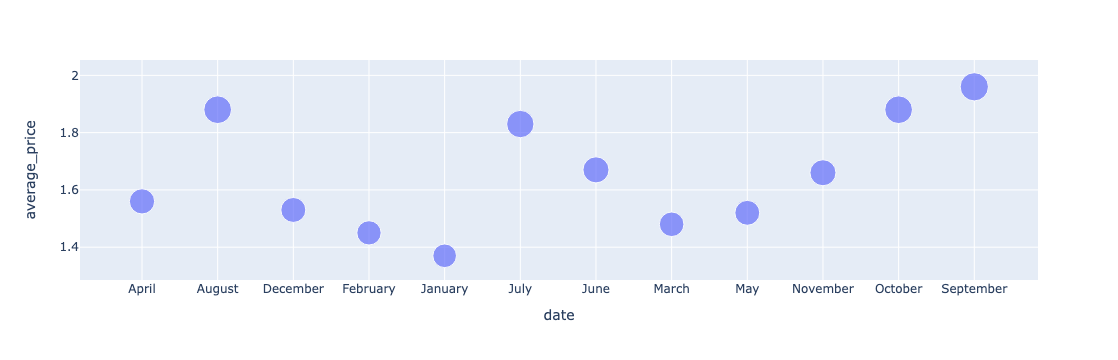

In [31]:
fig=px.scatter(single, x='date', y='average_price', size='average_price')
fig.show()

In [32]:
bubble_scatter = organic.groupby([organic['date'].dt.month_name(), 'region'])['total_volume'].mean().round(2).reset_index()
bubble_scatter.columns
bubble= bubble_scatter.query("region =='West'")


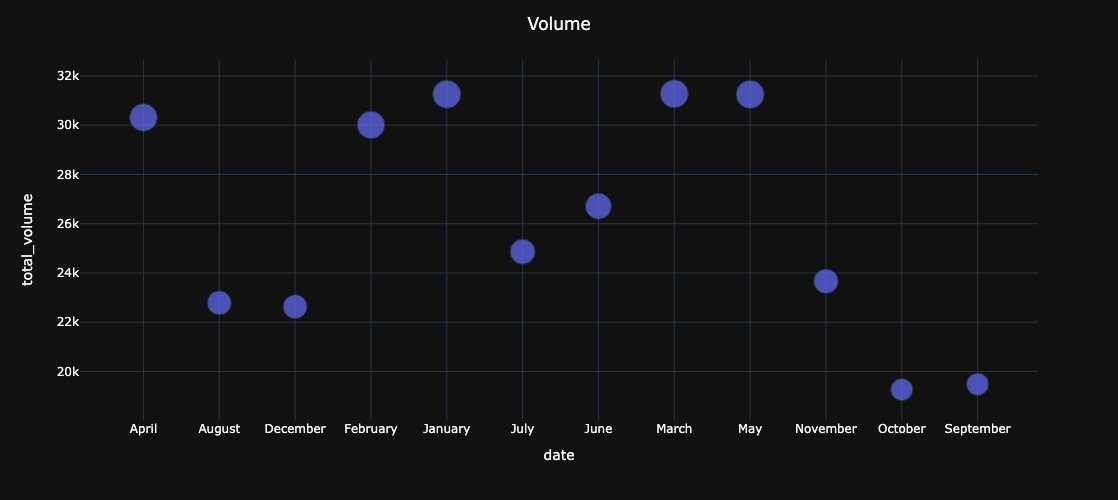

In [33]:
fig=px.scatter(bubble, x='date', y='total_volume', size='total_volume', color='region', width=800, height=500)
fig.update_layout(title='Volume', title_x=0.5, template='plotly_dark', showlegend=False)
fig.show()

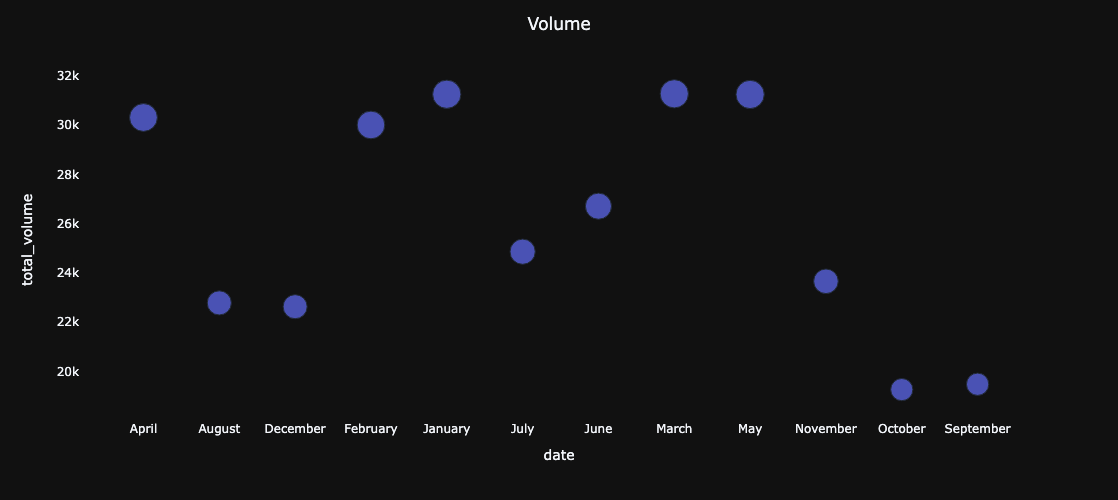

In [34]:
fig = px.scatter(bubble, x='date', y='total_volume', size='total_volume', color='region', width=800, height=500)
fig.update_layout(
    title='Volume',
    title_x=0.5,
    template='plotly_dark',
    showlegend=False,
    xaxis=dict(showgrid=False),  # Hide x-axis gridlines
    yaxis=dict(showgrid=False),  # Hide y-axis gridlines
)
fig.show()

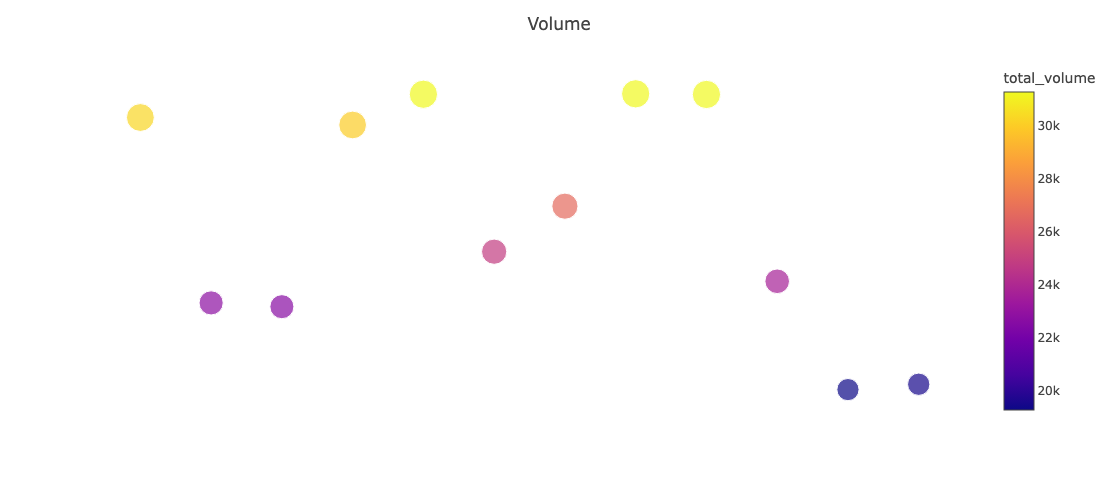

In [53]:
fig = px.scatter(bubble, x='date', y='total_volume', size='total_volume', color='total_volume', width=800, height=500)
fig.update_layout(
    title='Volume',
    title_x=0.5,
    template='none',
    showlegend=False,
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False, title=''),  # Hide x-axis gridlines, tick labels, and line
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False, title=''),  # Hide y-axis gridlines, tick labels, and line
    
)

fig.update_traces(marker=dict(colorbar=dict(title='')))
fig.show()

### Pie Charts and Donut Charts

In [40]:
avos.head(5)

date  average_price  total_volume          type  year  \
0 2015-01-04           1.22      40873.28  conventional  2015   
1 2015-01-04           1.79       1373.95       organic  2015   
2 2015-01-04           1.00     435021.49  conventional  2015   
3 2015-01-04           1.76       3846.69       organic  2015   
4 2015-01-04           1.08     788025.06  conventional  2015   

                  state        region  season  price_bin  average_revenue  
0                Albany     Northeast  winter        1.0        442865.39  
1                Albany     Northeast  winter        2.0        649777.91  
2               Atlanta     Southeast  winter        1.0        363004.42  
3               Atlanta     Southeast  winter        2.0        638887.77  
4  Baltimore/Washington  Mid-Atlantic  winter        1.0        392044.77

In [44]:
pie_chart = organic.groupby([organic['year'], 'region'])['total_volume'].mean().round(2).reset_index()
pie_chart

year         region  total_volume
0  2015   Mid-Atlantic       7957.18
1  2015        Midwest      11040.75
2  2015      Northeast       4774.41
3  2015  South Central      11290.03
4  2015      Southeast       3899.50
5  2015           West      26216.28

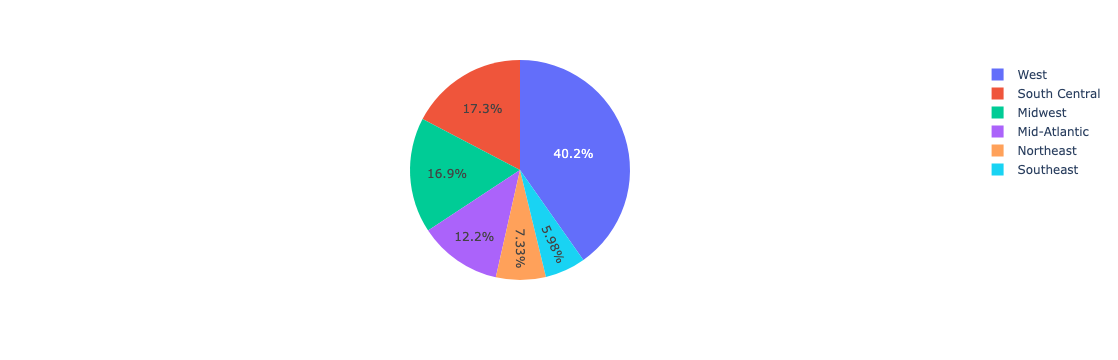

In [48]:
fig= px.pie(pie_chart, names='region', values='total_volume')
fig.show()

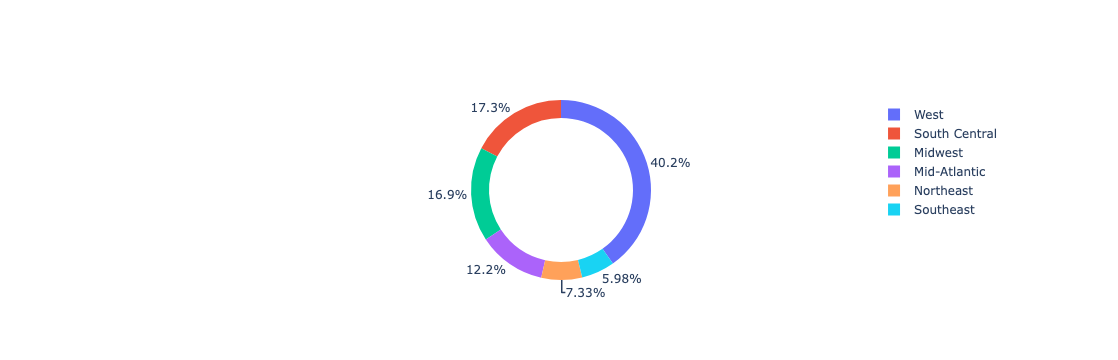

In [58]:
fig = go.Figure(go.Pie(
    labels=pie_chart['region'],
    values=pie_chart['total_volume'],
    hole=0.8
))

fig.show()